# Pymaceuticals Inc.
---

### Analysis

#1. The sex ratio for both male & female mouse is the almost the same.
#2. Capomulin & Ramicane drug work well compared to other 8 drugs 
#3. Only Infubinol has an outlier value among the four drugs : Capomulin, Ramicane, Infubinol, and Ceftamin
#4. Tumor Volume decrease over timepoints considerably with the use of Capomulin drug
#5. In the summary scatter plot for the drug Capomulin there is a strong positive correlation between the Weight & Tumor volume of the mouse, which means: the y values tend to #increase as the x values increases, in this case as the weight incraeses the tumor volume also increases.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
pharma_data_complete.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
mice_count = len(pharma_data_complete["Mouse ID"].unique())
mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

no_duplicate_mice = pharma_data_complete.loc[(pharma_data_complete["Mouse ID"] != "g989") | (pharma_data_complete["Timepoint"] != "g989"), :]
print(no_duplicate_mice)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint   
0        k403     Ramicane  Male          21          16          0  \
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_mouse = pharma_data_complete.loc[(pharma_data_complete["Mouse ID"] == "g989") | (pharma_data_complete["Timepoint"] == "g989"), :]
print(unique_mouse) 

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint   
908     g989     Propriva  Female          21          26          0  \
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#no_duplicate_mice = pharma_data_complete.drop(pharma_data_complete[(pharma_data_complete['Mouse ID'] != "g989")].index, inplace=True)           
#print(no_duplicate_mice)

In [10]:
pharma_data_complete_new = pd.DataFrame(no_duplicate_mice)
pharma_data_complete_new

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
pharma_data_complete_updated = pd.DataFrame(pharma_data_complete_new.loc[pharma_data_complete_new["Mouse ID"]!="g989", :])
pharma_data_complete_updated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
#pharma_data_complete_new.count()
new_mice_count = len(pharma_data_complete_updated["Mouse ID"].unique())
new_mice_count                     

248

In [13]:
#renaming the Tumor Volume column for easy calculation, taking out the (mm3)
pharma_data_complete_updated = pharma_data_complete_updated.rename(
    columns={"Tumor Volume (mm3)": "Tumor Volume"})
pharma_data_complete_updated.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
#set index by drug regine
Drug_data = pharma_data_complete_updated.set_index('Drug Regimen')
Drug_data

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [15]:
#group by Drug regime for calculations:
Drug_Regimen_groupby = pharma_data_complete_updated.groupby(['Drug Regimen'])
Drug_Regimen_groupby
Drug_Regimen_groupby.count().head(10)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume,Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [16]:
# new dataframe for only drug regimen & tumor volume
Drug_regimen_df = pd.DataFrame(Drug_Regimen_groupby[["Tumor Volume"]].sum())
Drug_regimen_df.head(10) 

,Tumor Volume
Drug Regimen,
Capomulin,9355.420462
Ceftamin,9361.228582
Infubinol,9413.493529
Ketapril,10384.299876
Naftisol,10105.671026
Placebo,9780.078122
Propriva,7743.497619
Ramicane,9169.417875
Stelasyn,9816.199991


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
Drug_data_grouped = Drug_data.groupby('Drug Regimen')

In [18]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_volume = Drug_data_grouped["Tumor Volume"].mean()
median_volume = Drug_data_grouped["Tumor Volume"].median()
var_volume = Drug_data_grouped["Tumor Volume"].var()
str_volume = Drug_data_grouped["Tumor Volume"].std()
sem_volume = Drug_data_grouped["Tumor Volume"].sem()

In [19]:
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                           "Median Tumor Volume": median_volume,
                           "Tumor Volume Varian": var_volume,
                           "Tumor Volume Std. Dev.": str_volume,
                           "Tumor Volume Std. Err.": sem_volume})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varian,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
summary_df2 = Drug_data.groupby('Drug Regimen').agg({'Tumor Volume': ['mean','median', 'var', 'std', 'sem']})
summary_df2

Tumor Volume                                          
                     mean     median        var       std       sem
Drug Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

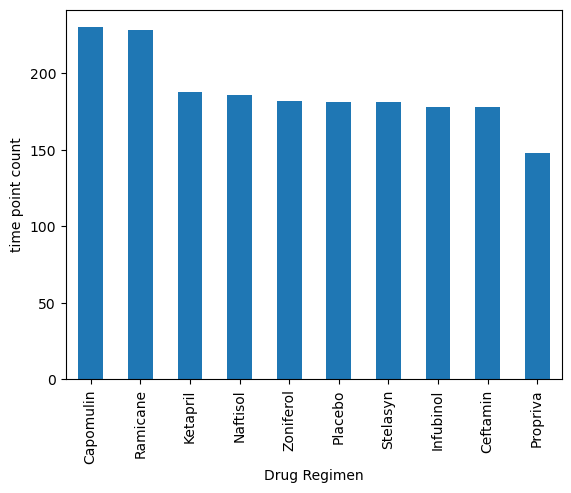

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Drug_Regimen_groupby = pharma_data_complete_updated['Drug Regimen'].value_counts()
Drug_Regimen_groupby.plot(kind="bar")
plt.ylabel("time point count")
plt.show()

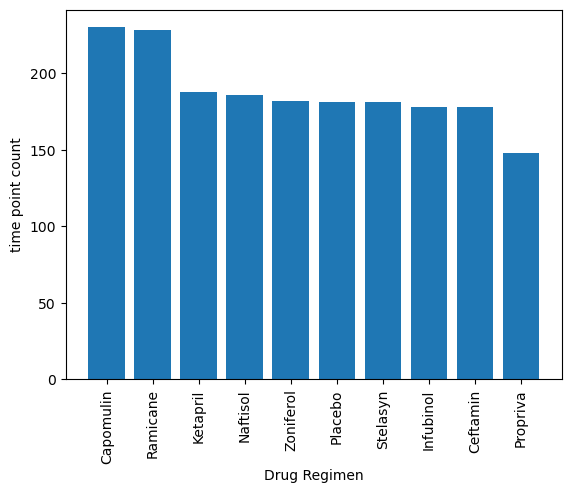

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = Drug_Regimen_groupby.index
y = Drug_Regimen_groupby.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("time point count")
plt.show()

## Bar and Pie Charts

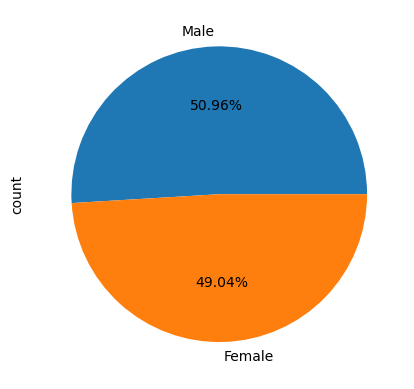

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_groupby = pharma_data_complete_updated['Sex'].value_counts()
sex_groupby.plot(kind="pie", autopct="%1.2f%%") 
plt.show()

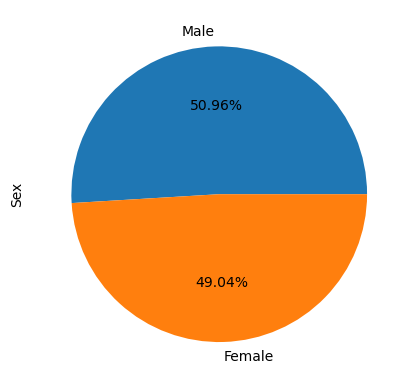

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

y = pharma_data_complete_updated['Sex'].value_counts()
plt.pie(y, labels=["Male", "Female"],autopct="%1.2f%%", shadow=False, startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pharma_data_complete_updated.groupby("Mouse ID")[["Timepoint"]].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, pharma_data_complete_updated, how="left",on=["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [26]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for T in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_series = merged_df.loc[merged_df["Drug Regimen"]==T]["Tumor Volume"]  
    
    # add subset 
    Tumor_list.append(Tumor_series)
    
    # Determine outliers using upper and lower bounds
    q1 = Tumor_series.quantile(0.25)
    q3 =   Tumor_series.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = Tumor_series.loc[(Tumor_series < fence_low) | (Tumor_series > fence_high)]
    print(T,df_out)

Capomulin Series([], Name: Tumor Volume, dtype: float64)
Ramicane Series([], Name: Tumor Volume, dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume, dtype: float64
Ceftamin Series([], Name: Tumor Volume, dtype: float64)


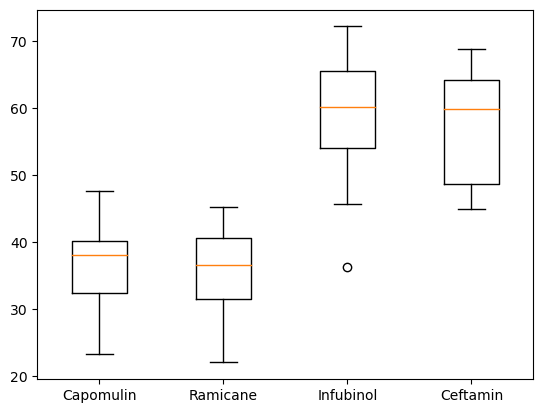

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Tumor_list, labels=Treatments)
plt.show()

## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Drug_df = pharma_data_complete_updated.loc[pharma_data_complete_updated["Mouse ID"]=="l509"]
Drug_df = Drug_df[["Mouse ID", "Timepoint", "Tumor Volume"]]
Drug_df.head(10)

,Mouse ID,Timepoint,Tumor Volume
371,l509,0,45.000000
372,l509,5,45.851193
373,l509,10,46.759074
374,l509,15,47.488599
375,l509,20,48.070452
376,l509,25,44.006257
377,l509,30,44.708055
378,l509,35,40.207288
379,l509,40,40.770813
380,l509,45,41.483008


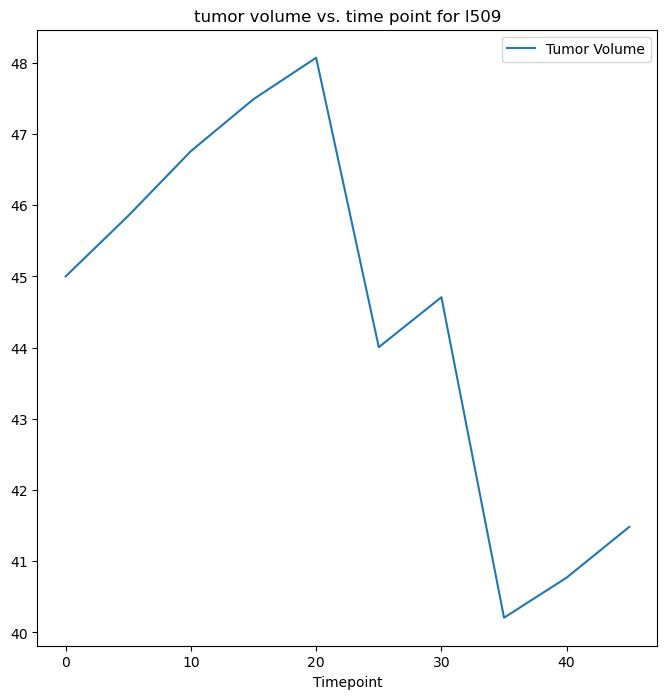

In [29]:
Drug_df.plot(kind="line", x="Timepoint", y="Tumor Volume", grid=False, figsize=(8,8),
              title="tumor volume vs. time point for l509")
plt.show()

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Drug_average_df = pharma_data_complete_updated.loc[pharma_data_complete_updated["Drug Regimen"]=="Capomulin"]
capomulin_average = Drug_average_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume']].mean()
capomulin_average

,Weight (g),Tumor Volume
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


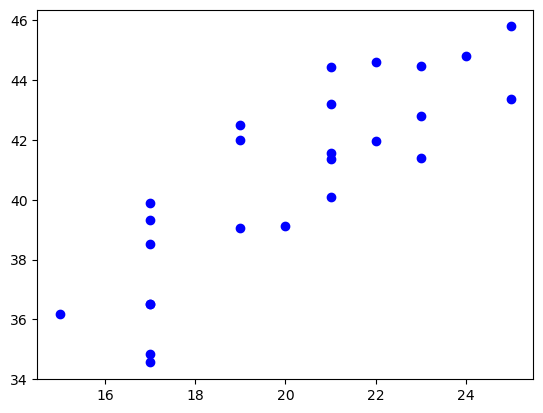

In [63]:
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume'], marker="o", facecolors="blue", edgecolors="blue")
plt.show()

## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume'])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)

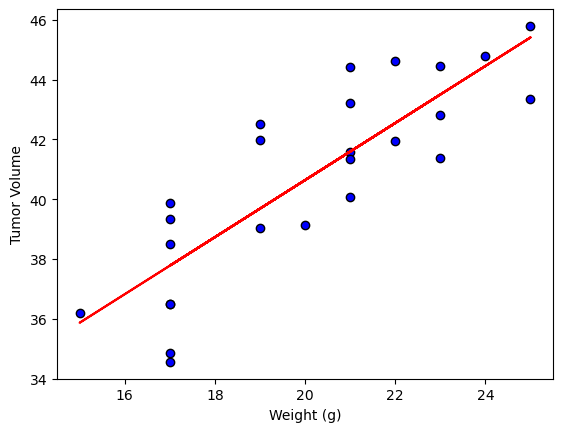

In [62]:
# Add the linear regression equation and line to plot
model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume'])

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume'], marker="o", facecolors="blue", edgecolors="black")
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.plot(x_values,y_values,"r-")
plt.annotate(model,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.show()